<a href="https://colab.research.google.com/github/DushyantKhinchi/Document_Word_Embedding_Visualization_with_PCA/blob/master/Document_Word_Embedding_Visualization_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Checking if the files are available
!ls "drive/Shared drives/Adv Text Homework/HW3"

 espn.rtf	    glove.6B.zip		     ids566_hw3.ipynb   UIC.txt
 glove.6B.50d.txt  'glove.6B.zip (Unzipped Files)'   nyt.rtf


In [ ]:
#importing dependencies
import nltk
from collections import Counter
nltk.download('punkt') # first-time use only
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#function for creating pos tags
def tags(file_path):
  #load data
  file = open(file_path, 'rt')
  text = file.read()
  file.close()
  # split into words
  tokens = nltk.word_tokenize(text)
  pos_tags = nltk.pos_tag(tokens)
  return pos_tags

In [ ]:
#getting pos tags
espn_pos = tags("drive/Shared drives/Adv Text Homework/HW3/espn.rtf")
nyt_pos = tags("drive/Shared drives/Adv Text Homework/HW3/nyt.rtf")
uic_pos = tags("drive/Shared drives/Adv Text Homework/HW3/UIC.txt")

In [ ]:
# creating key value pairs as mentioned in task <POS tag, its frequency/occurrences in the document)>
key_val_espn = dict(Counter(tag for word,  tag in espn_pos))
key_val_uic = dict(Counter(tag for word,  tag in uic_pos))
key_val_nyt = dict(Counter(tag for word,  tag in nyt_pos))

In [ ]:
#function for computing Similarity
def jaccard_similarity(dict1, dict2):
    s1 = set(dict1)
    s2 = set(dict2)
    return len(set(s1).intersection(s2)) / len(set(s1).union(s2))

In [ ]:
#Similarity between ESPN and UIC docs
espn_sim=jaccard_similarity(key_val_uic, key_val_espn)
#Similarity between NYT and UIC docs
nyt_sim=jaccard_similarity(key_val_uic, key_val_nyt)

print(espn_sim)


0.9024390243902439


In [ ]:
print(nyt_sim)

0.9047619047619048


# **Word Embedding Visualization**

In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import  stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize 
from nltk.stem.porter import PorterStemmer
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#to download Glove word embedding file
#import urllib.request
#url = 'http://nlp.stanford.edu/data/glove.6B.zip'
#urllib.request.urlretrieve(url, 'drive/Shared drives/Adv Text Homework/HW3/glove.6B.zip')


('drive/Shared drives/Adv Text Homework/HW3/glove.6B.zip',
 <http.client.HTTPMessage at 0x7f27a26e3940>)

In [ ]:
def read_data(file_name):
    with open(file_name,'r') as f:
        word_vocab = set() # not using list to avoid duplicate entry
        word2vector = {}
        for line in f:
            line_ = line.strip() #Remove white space
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [ ]:
vocab, w2v = read_data("drive/Shared drives/Adv Text Homework/HW3/glove.6B.50d.txt")

Total Words in DataSet: 400000


In [ ]:
vocab = list(vocab)

In [ ]:
#from scipy import spatial
#most similar words
#def find_closest_embeddings(embedding):
#    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [ ]:
#find_closest_embeddings(w2v["king"])[1:6]

['prince', 'queen', 'uncle', 'ii', 'grandson']

In [ ]:
# textual data cleaning function
def clean_text(rawfile):
  words = rawfile.split()
  table = str.maketrans('', '', string.punctuation)
  #remove punctuation
  stripped = [w.translate(table) for w in words]
  #converting to lowercase
  cleanfile = [s.lower() for s in stripped]
  #keeping only alphabetical words
  words = [word for word in stripped if word.isalpha()]
  return cleanfile

In [ ]:
import string
#loading files
uic_text = open("drive/Shared drives/Adv Text Homework/HW3/UIC.txt")
uic = uic_text.read()
uic = clean_text(uic)

In [ ]:
# Removing stopwords and stemming
def stop_and_stem(textfile):
  stopword = stopwords.words('english')
  word = [w for w in textfile if not w in stopword]
  print(word[:100])
  #stemming
  porter = PorterStemmer()
  stemmed = [porter.stem(w) for w in word]
  print(stemmed[:100])
  return stemmed  
  

In [ ]:
uic_tidy = stop_and_stem(uic)

['thank', '❤️', 'contributions', 'receive', 'community', 'readers', 'editors', 'donors', 'keep', 'us', 'strong', '2020', 'ask', 'humbly', 'help', 'us', 'improve', 'wikipedia', 'answering', 'questions', 'thanks', 'participationthis', 'survey', 'powered', 'thirdparty', 'service', 'please', 'see', 'survey', 'privacy', 'statement', 'university', 'illinois', 'chicago', 'wikipedia', 'free', 'encyclopedia', 'jump', 'navigationjump', 'search', 'university', 'illinois', 'chicago', 'redirects', 'private', 'university', 'chicago', 'see', 'university', 'chicago', 'university', 'illinois', 'chicago', 'university', 'illinois', 'chicago', 'circle', 'logosvg', 'motto', 'teach', 'research', 'serve', 'care', 'type', 'public', 'aanapisi1', 'hsi2', 'established', '1982', 'academic', 'affiliations', 'universities', 'research', 'association', 'great', 'cities', 'universities', 'endowment', '228', 'billion', 'entire', 'u', 'system3', 'chancellor', 'michael', 'amiridis4', 'president', 'timothy', 'l', 'killeen

In [ ]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [ ]:
print(intersection(uic_tidy, vocab)) 

['thank', 'commun', 'reader', 'editor', 'donor', 'keep', 'us', 'strong', '2020', 'ask', 'help', 'us', 'improv', 'wikipedia', 'answer', 'question', 'thank', 'survey', 'power', 'pleas', 'see', 'survey', 'statement', 'univers', 'chicago', 'wikipedia', 'free', 'encyclopedia', 'jump', 'search', 'univers', 'chicago', 'redirect', 'privat', 'univers', 'chicago', 'see', 'univers', 'chicago', 'univers', 'chicago', 'univers', 'chicago', 'motto', 'teach', 'research', 'serv', 'care', 'type', 'public', 'establish', '1982', 'univers', 'research', 'great', 'citi', 'univers', 'endow', '228', 'billion', 'u', 'chancellor', 'michael', 'l', 'provost', 'susan', 'staff', 'student', 'chicago', 'unit', 'state', 'urban', '244', 'acr', '987', 'ha', 'color', 'indigo', 'blue', 'flame', 'flame', 'sport', 'ncaa', 'divis', '–', 'horizon', 'mascot', 'dragon', 'univers', 'chicago', 'univers', 'chicago', 'uic', 'public', 'research', 'univers', 'chicago', 'near', 'west', 'side', 'commun', 'area', 'chicago', 'loop', 'seco

In [ ]:
words_to_project=intersection(uic_tidy, vocab)

#Removing numbers
words_to_project = [x for x in words_to_project if not (x.isdigit() 
                                         or x[0] == '-' and x[1:].isdigit())]

#Sampling 50 random words
import random
random.seed(0)
words_to_project= random.sample(words_to_project, 50)

In [ ]:
#PCA 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
# Converting word vocabulary to matrix form

def return_matrix(word_list,dim =50):
    word_matrix = np.random.randn(len(word_list),dim)
    i = 0
    for word in word_list:
        word_matrix[i] = w2v[word]
        i +=1
    return word_matrix

In [ ]:
return_matrix_ = return_matrix(words_to_project)
pca_ = PCA(n_components=2)
viz_data = pca_.fit_transform(return_matrix_) 

(-4, 4)

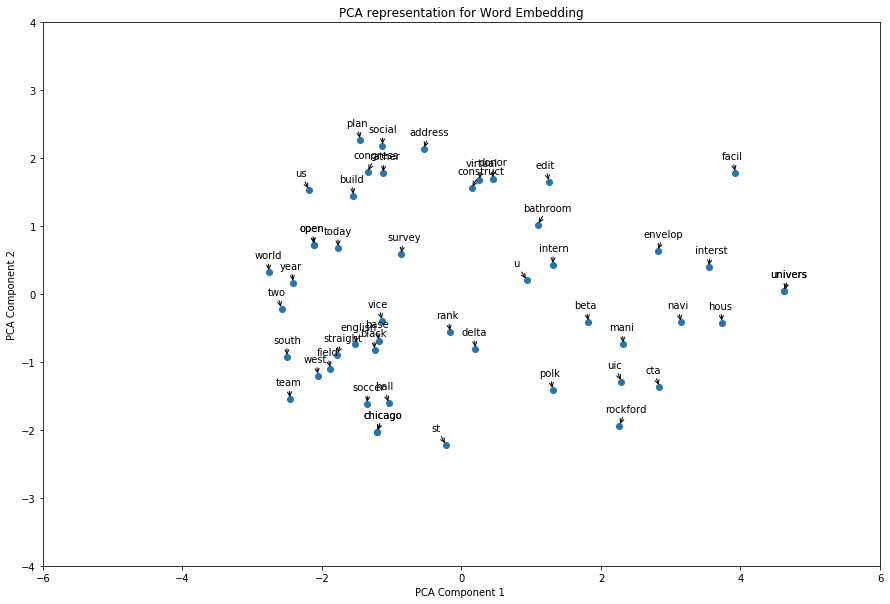

In [ ]:
#Plotting PCA values for 50 random words
plt.scatter(viz_data[:,0],viz_data[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(words_to_project,viz_data[:,0],viz_data[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2')
plt.title('PCA representation for Word Embedding')
plt.xlim(-6,6)
plt.ylim(-4,4)